**Welcome to the universe of STATISTICS**

In this script you will notice nothing less but a confidence interval / t-test for the classification results (which are in the csv file). BUT BE CAREFUL WARRIOR; The MCNemar has not been tested as there isn't enough data saved for it yet.

If you're in doubt in relation to saving the data as a .csv file, fear no more; as i have used the following :

In [ ]:
# import pandas as pd

# table = np.array([n_list, opt_h, ANN_error_test, opt_lambda, log_test_error, base_line_test_err])

# df = pd.DataFrame(np.transpose(table))

# df.to_csv('classification_results.csv', index = False, header = ["test_size", "h", "ANN", "lambda", "Log", "Base"])



In [1]:
import pandas as pd
import numpy as np

classification_results = pd.read_csv('classification_results.csv')



In [7]:
errors = classification_results[["ANN", "Log", "Base"]]
names = errors.columns
array = np.transpose(errors.to_numpy())
array


array([0.45454545, 0.31818182, 0.22727273, 0.31818182, 0.23809524,
       0.38095238, 0.38095238, 0.38095238, 0.47619048, 0.23809524])

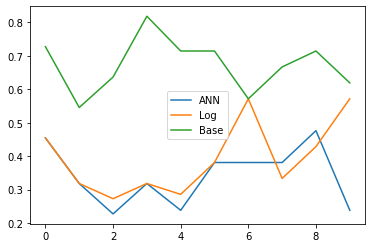

In [9]:
import matplotlib.pyplot as plt



plt.plot(array[0])
plt.plot(array[1])
plt.plot(array[2])
#plt.axhline(0.5,color='red')
plt.legend(['ANN', 'Log', 'Base'])
plt.show()

In [22]:
precision  = 3 #antal decimaler

abe = classification_results.style.format(precision = precision)
print(abe.to_latex(hrules=True))

\begin{tabular}{lrrrrrr}
\toprule
 & test_size & h & ANN & lambda & Log & Base \\
\midrule
0 & 22.000 & 9.000 & 0.455 & 0.599 & 0.455 & 0.727 \\
1 & 22.000 & 9.000 & 0.318 & 0.046 & 0.318 & 0.545 \\
2 & 22.000 & 7.000 & 0.227 & 0.599 & 0.273 & 0.636 \\
3 & 22.000 & 10.000 & 0.318 & 0.046 & 0.318 & 0.818 \\
4 & 21.000 & 10.000 & 0.238 & 0.599 & 0.286 & 0.714 \\
5 & 21.000 & 8.000 & 0.381 & 0.046 & 0.381 & 0.714 \\
6 & 21.000 & 8.000 & 0.381 & 0.046 & 0.571 & 0.571 \\
7 & 21.000 & 9.000 & 0.381 & 0.004 & 0.333 & 0.667 \\
8 & 21.000 & 10.000 & 0.476 & 0.046 & 0.429 & 0.714 \\
9 & 21.000 & 6.000 & 0.238 & 0.000 & 0.571 & 0.619 \\
\bottomrule
\end{tabular}



In [23]:
####################
## METHOD 11.4.1 (p 216)

import scipy.stats as stats
import numpy as np

# Calculating the difference in error between the models (pair-wise)

# index for which models to compare
index_for_models = [(0,1), (0,2), (1,2)]

#* confidence intervals
for (i,j) in index_for_models:
    error_for_model_1 = array[i,:]
    error_for_model_2 = array[j,:]
    # obtaining an array of the difference in generalized error for the models
    #TODO: abs or not?
    r_list = abs(error_for_model_1 - error_for_model_2)
    
    # confidence interval:
    alpha = 0.05 # 95%-confidence interval
    J = 10 # J is the amount of folds
    K = 10 # What is K?
    sigma_hat = np.var(r_list) # Estimated variance of the errors
    r_hat = np.mean(r_list)
    c1 = stats.t.ppf(alpha/2, df = J - 1, loc =  r_hat, scale = sigma_hat*(1/J + 1/(K-1)))
    c2 = stats.t.ppf(1-alpha/2, df = J - 1, loc = 1/J * np.sum(r_list), scale = sigma_hat*(1/J + 1/(K-1)))
    print("Confidence interval for error difference between {} and {}".format(names[i], names[j]))
    print("[ {:.2f} , {:.2f} ]\n".format(c1,c2))


#* p-values
print("H_0: The models have the same performance")
print("-"*50)
for (i,j) in index_for_models:
    error_for_model_1 = array[i,:]
    error_for_model_2 = array[j,:]
    r_list = abs(error_for_model_1 - error_for_model_2)
    r_hat = np.mean(r_list)
    sigma_hat = np.var(r_list)
    J = 10
    K = 10
    P = 1/K
    t_hat = r_hat/(sigma_hat * np.sqrt(1/J + P/(1-P)))
    p = 2 * stats.t.cdf(- abs(t_hat), df = J - 1, loc = 0, scale = 1)
    print("p-value for differnce between {} and {}".format(names[i], names[j]))
    print("p-value: ", p, "\n")





Confidence interval for error difference between ANN and Log
[ 0.07 , 0.08 ]

Confidence interval for error difference between ANN and Base
[ 0.33 , 0.34 ]

Confidence interval for error difference between Log and Base
[ 0.27 , 0.29 ]

H_0: The models have the same performance
--------------------------------------------------
p-value for differnce between ANN and Log
p-value:  1.3571134494614427e-07 

p-value for differnce between ANN and Base
p-value:  1.2294983181543323e-13 

p-value for differnce between Log and Base
p-value:  4.86068893219175e-10 



In [ ]:
# DOESNT WORK YEt

import scipy.stats as stats


(y_test) = "abe"
(y_test_est_ann) = "abe"
(y_test_est_log) = "abe"
base = (y_test == big_class)

index_for_models = [(0,1), (0,2), (1,2)]


# McNemar for the first 3 folds
for i in range(3):
    for (i,j) in index_for_models:
        #comparing the two models; calculatting the different counts
        array_1 = (model_1 == y_test)
        array_2 = (model_2 == y_test)

        n = len(y_test)

        n11 = np.dot(array_1, array_2)
        n12 = np.dot(array_1, (1 - array_2))
        n21 = np.dot((1 - array_1, array_2))
        n22 = np.dot((1 - array_1), (1-array_2))

        E_theta = (n12 - n21)/n

        Q = (n**2 * (n+1) * (E_theta + 1)*(1 - E_theta))/(n * (n12 + n21) - (n12 - n21)**2)

        f = (E_theta+1)/2 * (Q - 1)
        g = (1 - E_theta)/2 * (Q - 1)

        alpha = 0.05

        L = 2 * stats.beta.ppf(alpha/2, a = f, b = g) - 1
        U = 2 * stats.beta.ppf(1 - alpha/2, a = f, b = g) - 1
        print("Confidence interval (mcnemar) between {} and {}".format(names[i], names[j]))
        print("[ {:.2f} , {:.2f} ]\n".format(L,U))
    
    print("H_0: The models have the same performance")
    print("-"*50)

    for (i,j) in index_for_models:
        array_1 = (model_1 == y_test)
        array_2 = (model_2 == y_test)

        n = len(y_test)

        n12 = np.dot(array_1, (1 - array_2))
        n21 = np.dot((1 - array_1, array_2))

        m = min(n21, n21)
        p = 2 * stats.binom.cdf(m, n = n12 + n21, p = 1/2)
        print("p-value : {}".format(p))
        
